# Interaction

Research can be a hill that you climb to reach the bottom of a mountain.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Function for $F_d$ and D

In [2]:
def pared(fd, D):
    a1 = 2.53
    b1 = 0.606
    c1 = 4.27
    d1 = 0.45
    def A(D):
        return a1 * np.exp(-b1*(D-c1)) + d1
    
    def B(D):
        return 3.08
    
    def C(D):
        return 0.932
    
    a4 = 38.431
    b4 = 0.09157
    c4 = 0.75734
    h4 = 17.9118
    def L(D):
        return a4 * np.exp(-b4*D) * np.log(c4*D) + h4
    
    a5 = 1.78
    b5 = 0.59
    c5 = 2.14
    d5 = 1.15
    def M(D):
        return a5 * np.exp(-b5*(D-c5)) + d5
    
    b6 = 2.04
    c6 = 2.95
    k6 = 0.24
    def N(D):
        return c6 * (b6 - np.exp(-k6*D))
    
    return A(D) / (1 + np.exp(-B(D) * (fd - C(D)))) \
        + L(D) / (1 + np.exp(-M(D) * (fd - N(D))))

# (ar+1)(bT+1) form

In [3]:
jar = pd.read_csv('fuel_swelling_5-grains_no-fitting.csv')

fd = 'Fission Density (10^21 f/cm3)'
gs = 'Grain Size (um)'
fr = 'Fission Rate (10^14 f/cm3/s)'
fgs = 'Fuel Gas Swelling (%)'
ct = 'Coolant init Temp (C)'

In [4]:
def amal(fd, D, r, T):
    m1 = 0.10456234
    m2 = 0.00951745
    return pared(fd, D) * (m1 * (r-6) + 1) * (m2 * (T-88) + 1)

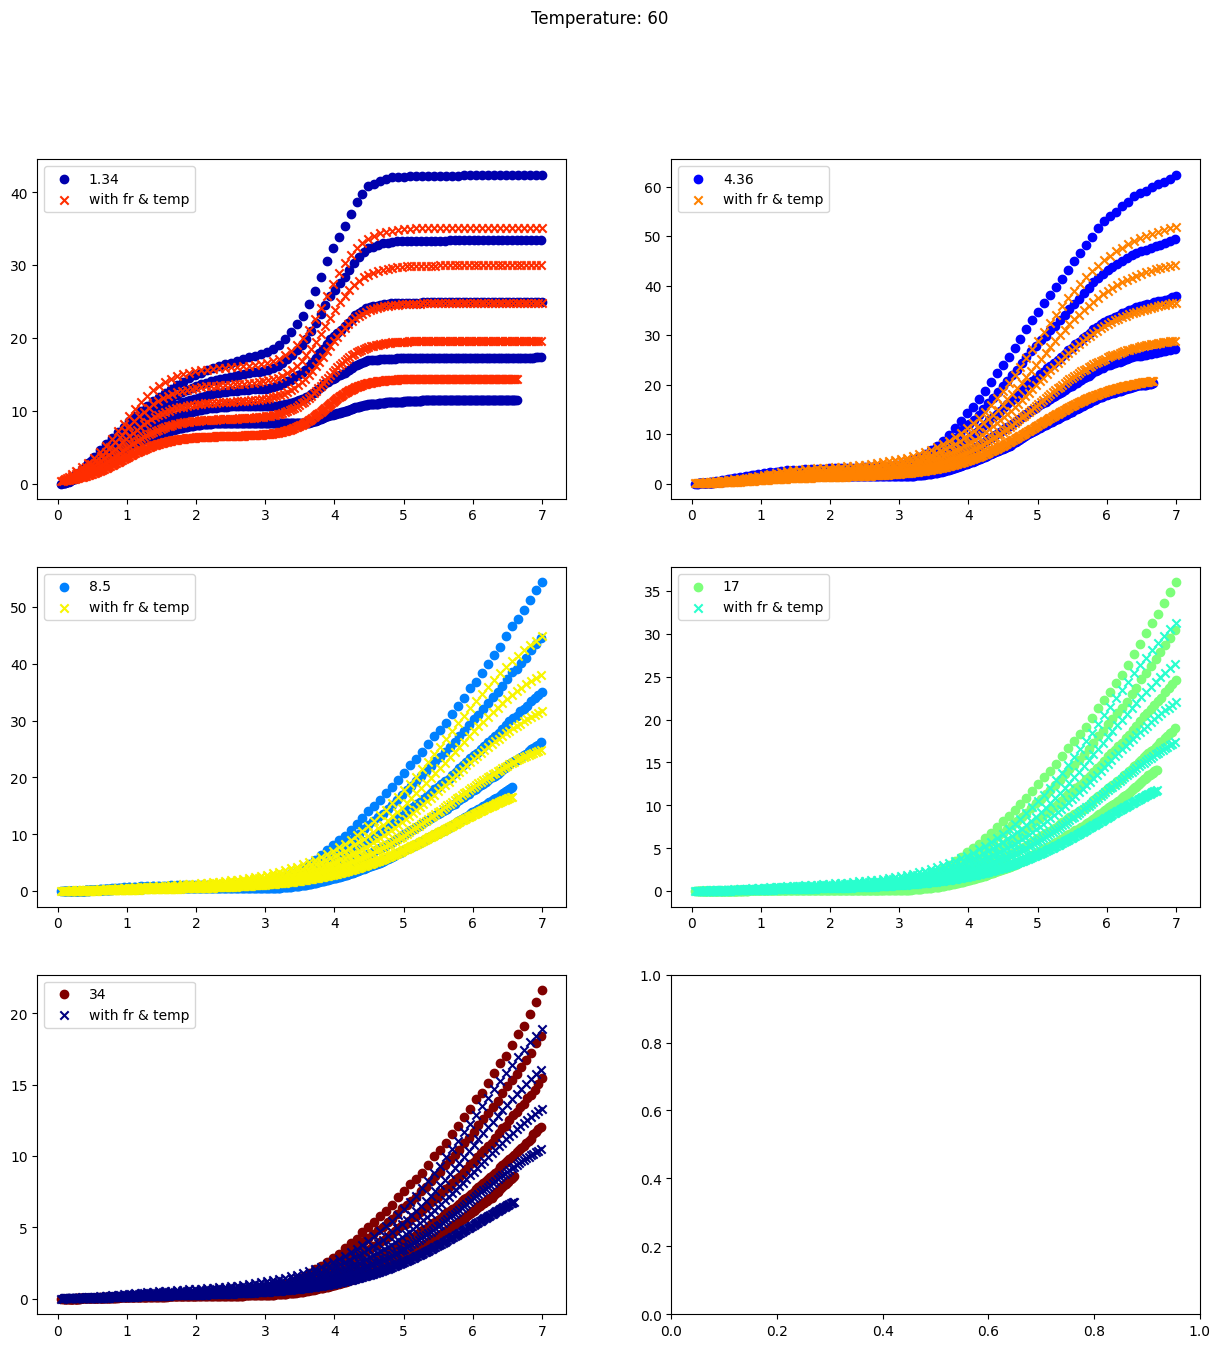

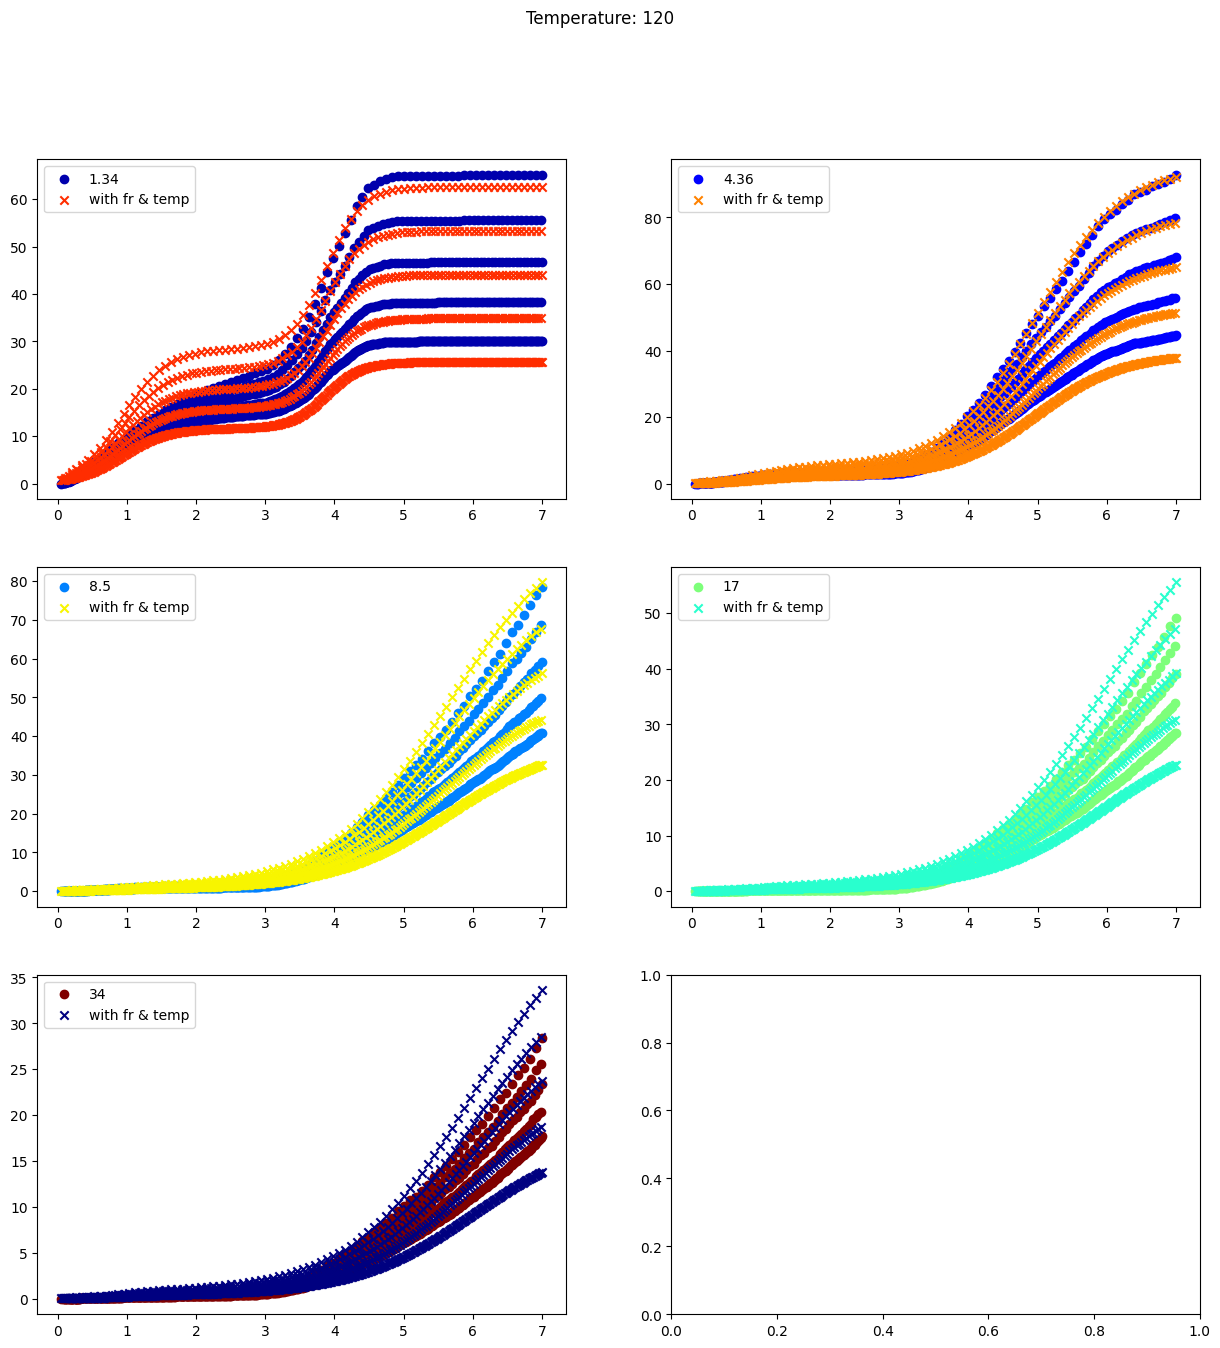

In [5]:
#for cool in [60, 75, 88, 105, 120]:
for cool in [60, 120]:
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    fig.suptitle(f'Temperature: {cool}')
    
    for i, G in zip(range(5), [1.34, 4.36, 8.5, 17, 34]):
        foo = jar.loc[(jar['Coolant init Temp (C)'] == cool) & (jar[gs] == G)]
        axs[i//2, i%2].scatter(foo[fd], foo[fgs], color=plt.cm.jet(G/34), label=f'{G}')
        pred = amal(foo[fd], foo[gs], foo[fr], foo[ct])
        axs[i//2, i%2].scatter(foo[fd], pred, marker='x', color=plt.cm.jet(0.9-G/34), label='with fr & temp')
        axs[i//2, i%2].legend()
        
    plt.show()

# (ar + bT + 1) linear form

The new function can be $f = m_1 (r-6) + m_2 (T-88) + 1$.

In [6]:
def test(X, a, b):
    fd, D, r, T = X
    return pared(fd, D) * (a*(r-6) + b*(T-88) + 1)

In [7]:
popt, pcov = curve_fit(test, (jar[fd], jar[gs], jar[fr], jar[ct]), jar[fgs])
popt

array([0.10102488, 0.00909582])

In [8]:
def comb(fd, D, r, T):
    m1 = 0.10102488
    m2 = 0.00909582
    return pared(fd, D) * (m1*(r-6) + m2*(T-88) + 1)

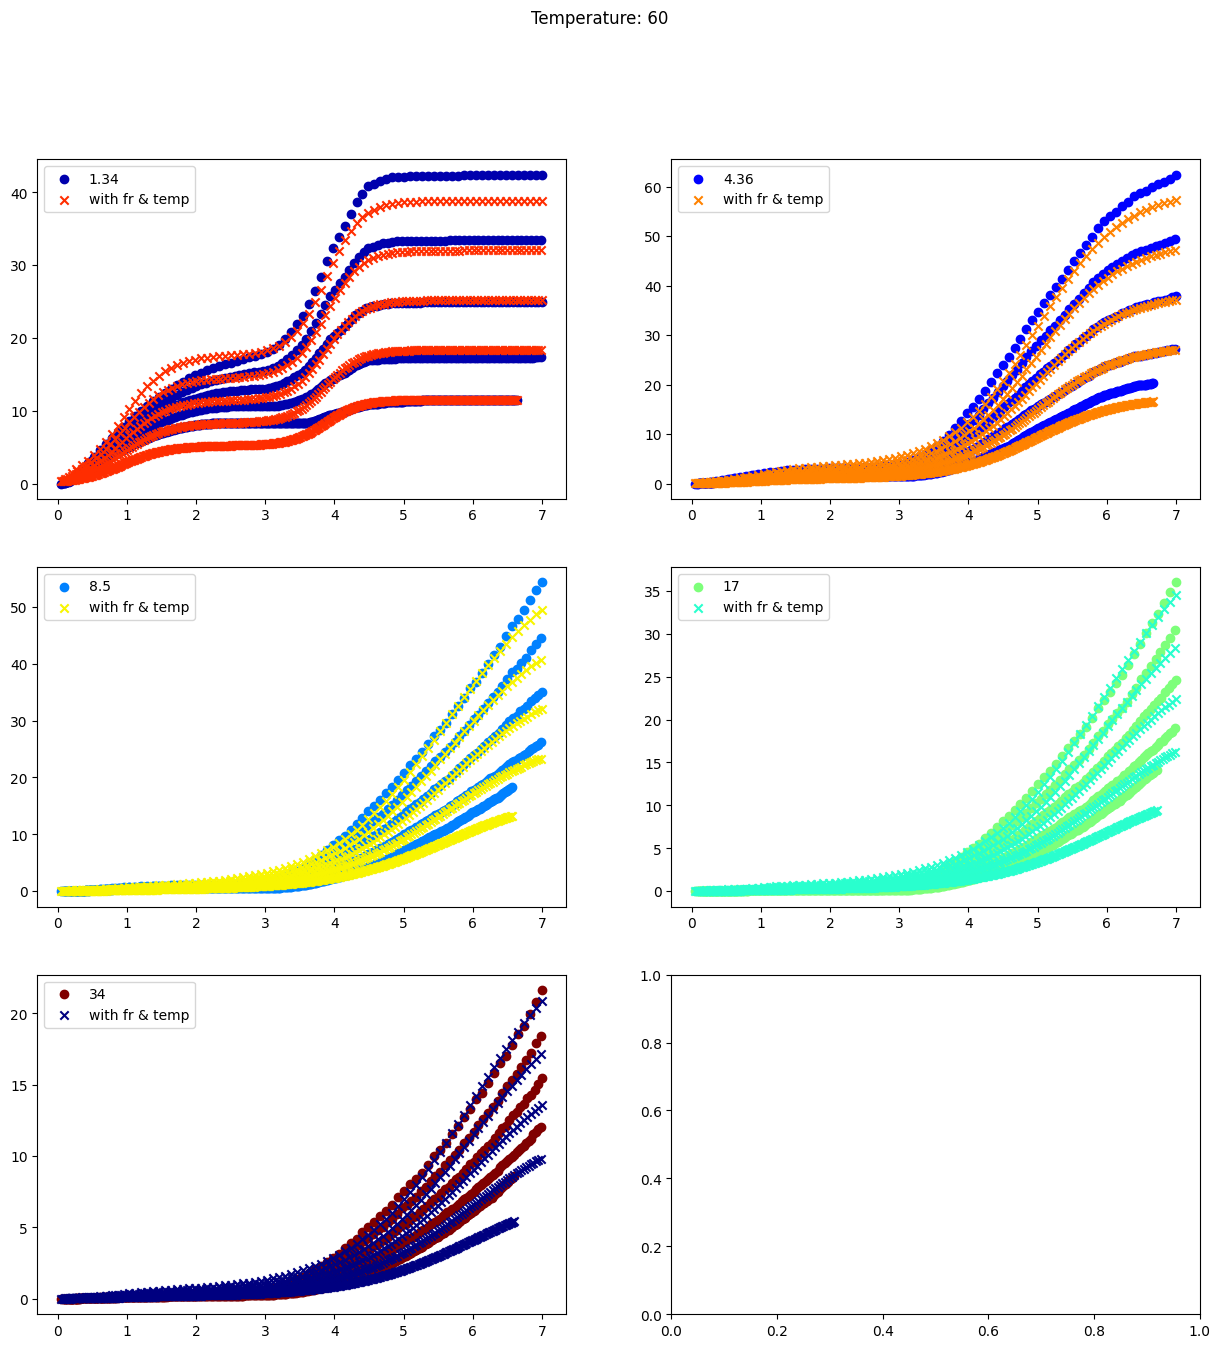

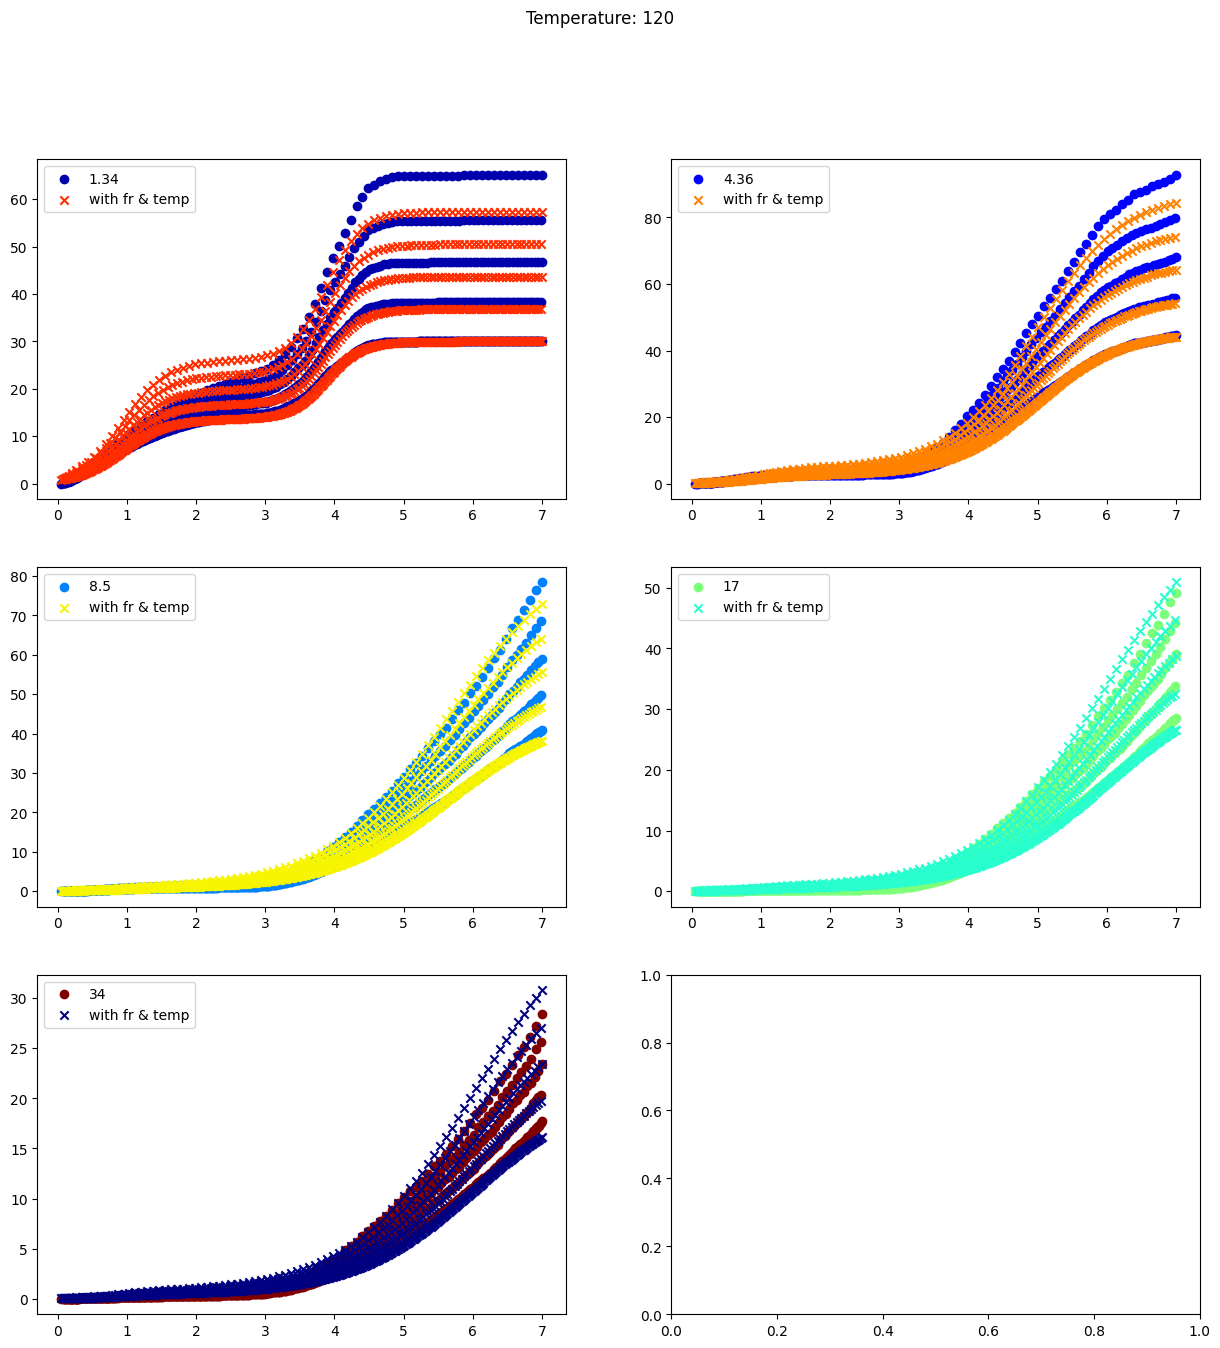

In [9]:
#for cool in [60, 75, 88, 105, 120]:
for cool in [60, 120]:
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    fig.suptitle(f'Temperature: {cool}')
    
    for i, G in zip(range(5), [1.34, 4.36, 8.5, 17, 34]):
        foo = jar.loc[(jar['Coolant init Temp (C)'] == cool) & (jar[gs] == G)]
        axs[i//2, i%2].scatter(foo[fd], foo[fgs], color=plt.cm.jet(G/34), label=f'{G}')
        pred = comb(foo[fd], foo[gs], foo[fr], foo[ct])
        axs[i//2, i%2].scatter(foo[fd], pred, marker='x', color=plt.cm.jet(0.9-G/34), label='with fr & temp')
        axs[i//2, i%2].legend()
        
    plt.show()

# (ar + bT + crT) interaction form

The function has the form $f = a(r-6) + b(T-88) + c(r-6)(T-88) + 1$.

In [10]:
def test2(X, a, b, c):
    fd, D, r, T = X
    return pared(fd, D) * (a*(r-6) + b*(T-88) + c*(r-6)*(T-88) + 1)

In [11]:
popt, pcov = curve_fit(test2, (jar[fd], jar[gs], jar[fr], jar[ct]), jar[fgs])
popt

array([0.10077596, 0.00931255, 0.00014306])

In [12]:
def comb2(fd, D, r, T):
    a = 0.10077596
    b = 0.00931255
    c = 0.00014306
    return pared(fd, D) * (a*(r-6) + b*(T-88) + c*(r-6)*(T-88) + 1)

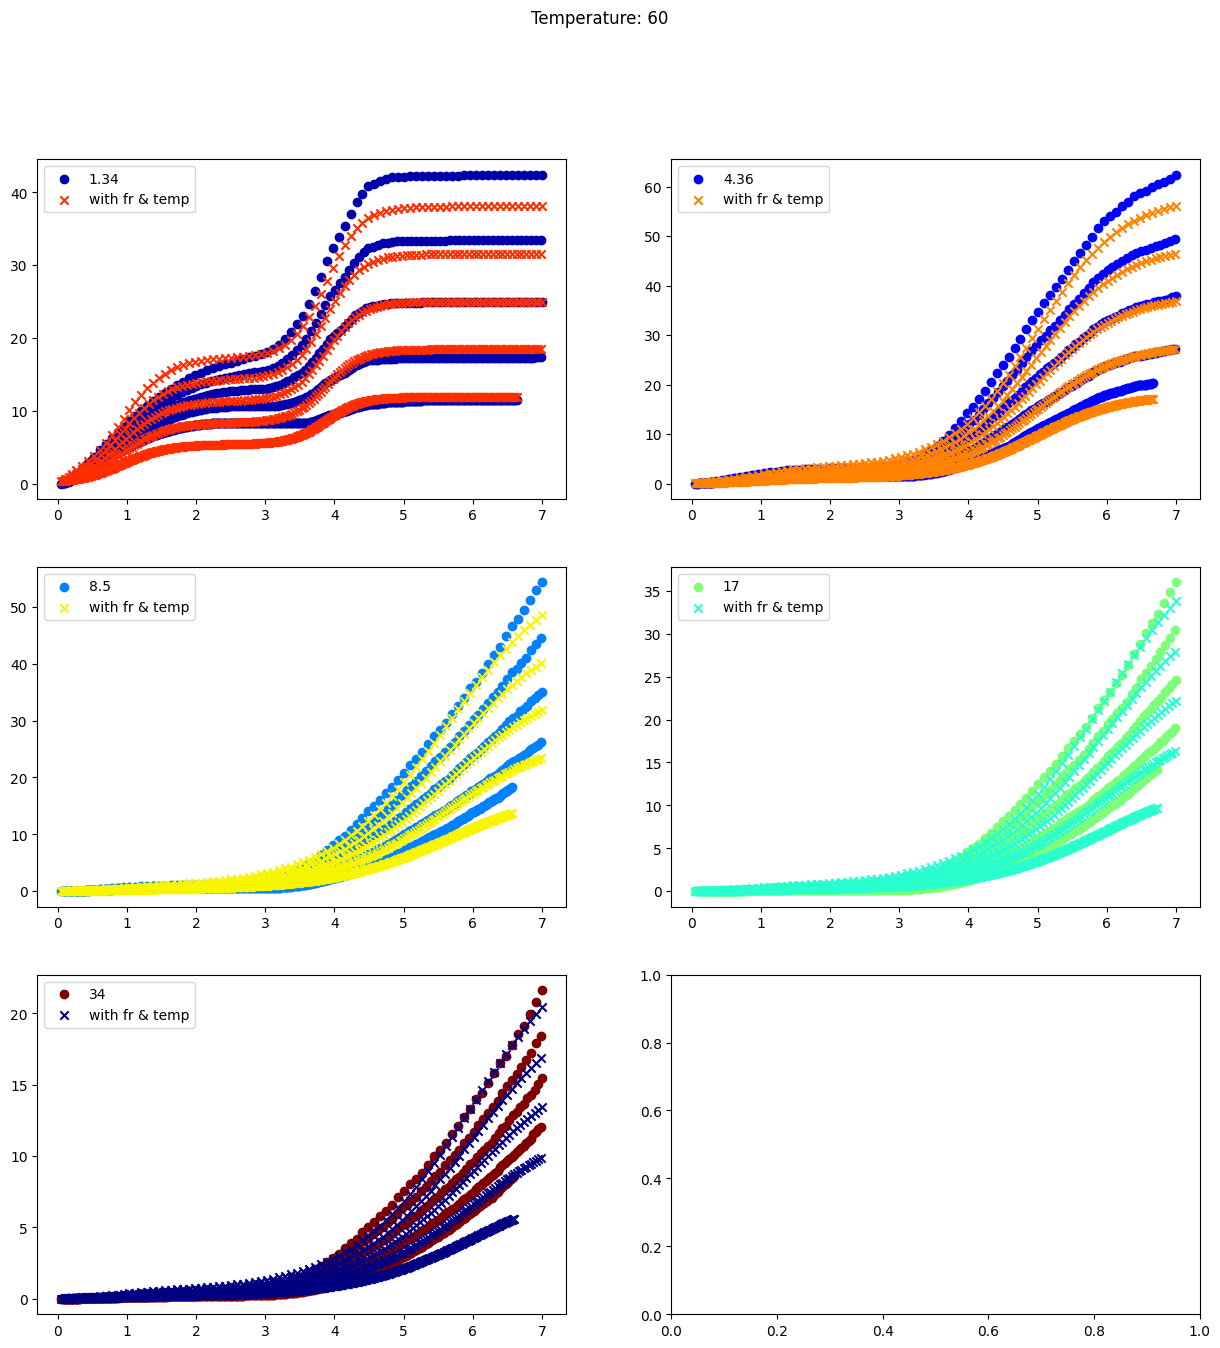

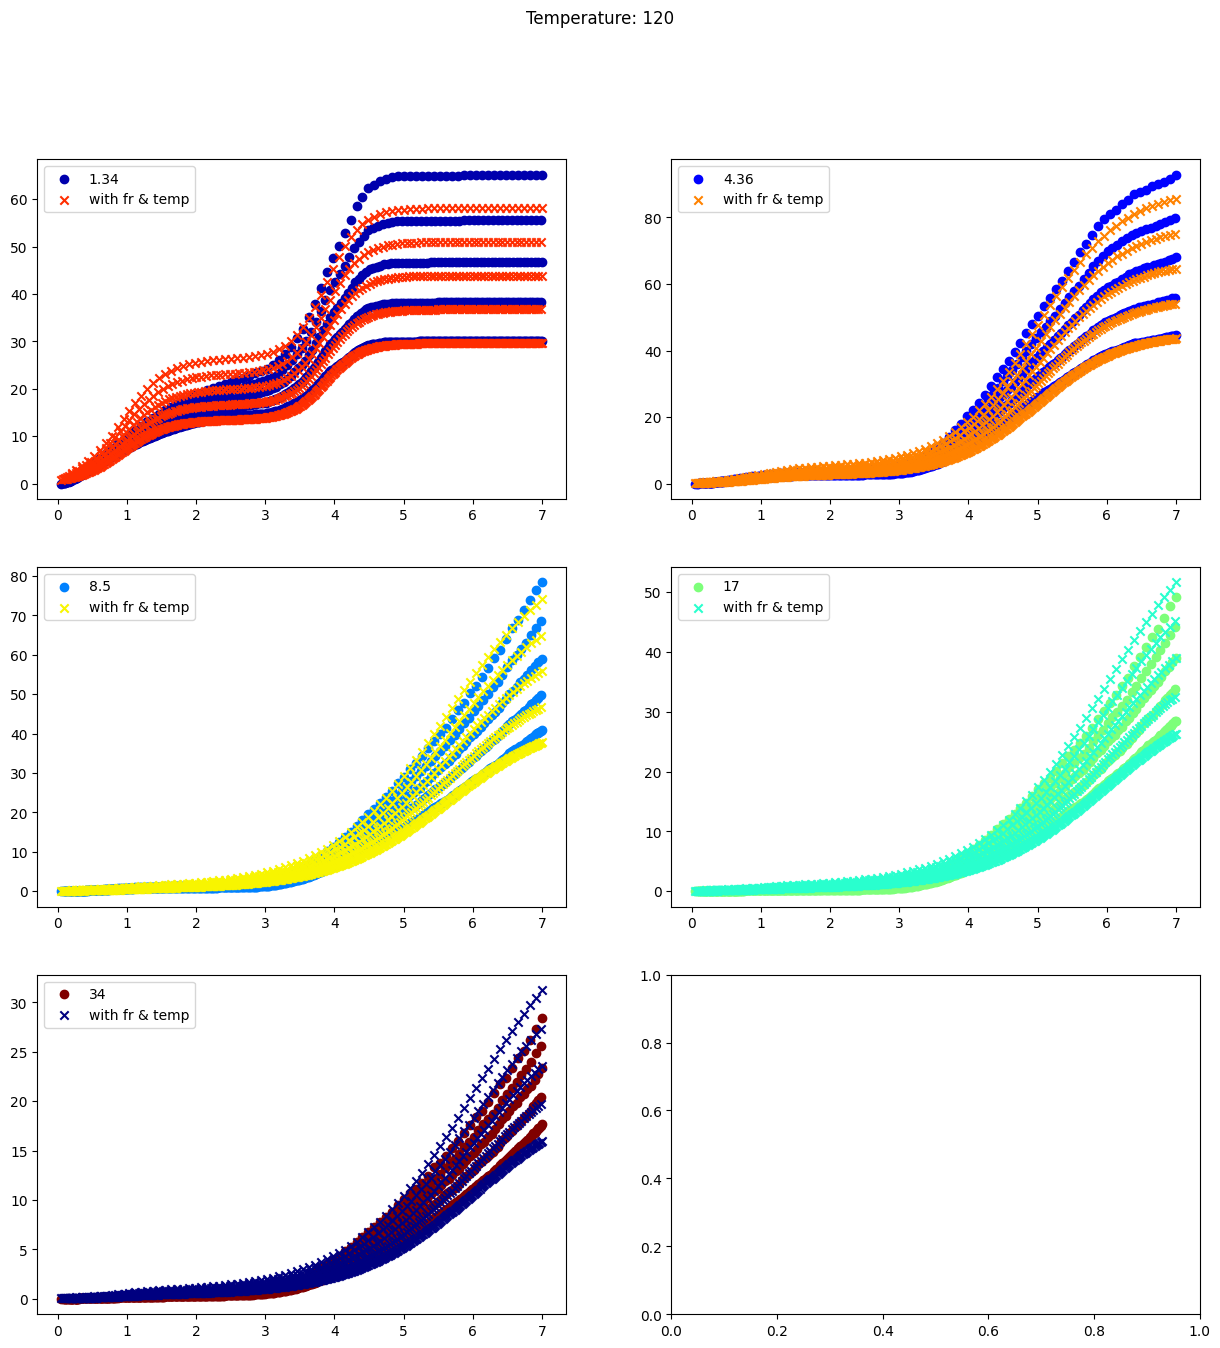

In [13]:
#for cool in [60, 75, 88, 105, 120]:
for cool in [60, 120]:
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    fig.suptitle(f'Temperature: {cool}')
    
    for i, G in zip(range(5), [1.34, 4.36, 8.5, 17, 34]):
        foo = jar.loc[(jar['Coolant init Temp (C)'] == cool) & (jar[gs] == G)]
        axs[i//2, i%2].scatter(foo[fd], foo[fgs], color=plt.cm.jet(G/34), label=f'{G}')
        pred = comb2(foo[fd], foo[gs], foo[fr], foo[ct])
        axs[i//2, i%2].scatter(foo[fd], pred, marker='x', color=plt.cm.jet(0.9-G/34), label='with fr & temp')
        axs[i//2, i%2].legend()
        
    plt.show()

# Conclusion

This is how the fits fare:

$(ar+bT+crT) > (ar+bT+1) > (ar+1)(bT+1)$

However, $c$ is small and the associated model is not signficantly better than $(ar+bT+1)$. If we are stuck with the approach $f_1(fd,D) * f_2(r,T)$, we can just go with $(ar+bT+1)$.

But before we sign off, we can try another approach. We will multiply functions of form $(ar+bT+1)$ to both A and L. That's 4 extra parameters. The functions will, of course, be anchored to nominal values of r and T.